In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [3]:
def pulse_train(t, T=2*np.pi, D=0.5, A=1.0):
    """
    Genera un tren de pulsos periódicos de amplitud A,
    periodo T y duty cycle D.

    Parámetros
    ----------
    t : ndarray
        Vector temporal (s o rad, según el contexto).
    T : float
        Periodo de la señal.
    D : float
        Duty cycle (fracción del periodo con valor alto). 0 < D <= 1
    A : float
        Amplitud del pulso.

    Retorna
    -------
    x : ndarray
        Señal periódica x(t) de tipo pulso.
    """
    if not (0 < D <= 1):
        raise ValueError("El duty cycle D debe estar en (0, 1].")

    # Llevar t a su fase dentro de un periodo [0, T)
    phase = np.mod(t, T)
    # Valor alto durante D*T, bajo el resto
    x = np.where(phase < D*T, A, 0.0)
    return x

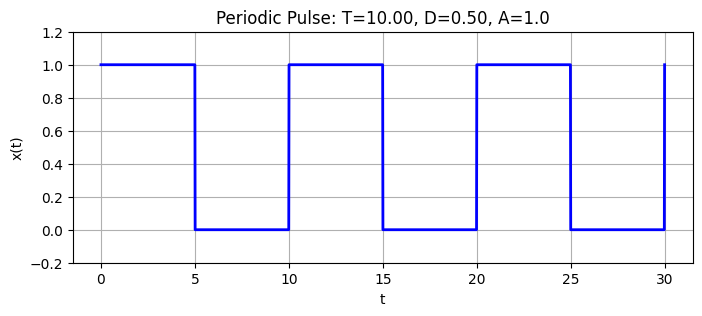

In [ ]:
# Parámetros de ejemplo
T = 10         # periodo
D = 0.5            # duty cycle 25%
A = 1.0             # amplitud
N_periods = 3       # número de periodos a visualizar

# Malla temporal
t_num = np.linspace(0, N_periods*T, 2000)

# Generar señal
x_num = pulse_train(t, T=T, D=D, A=A)

# Graficar
plt.figure(figsize=(8, 3))
plt.plot(t_num, x_num, color="blue", lw=2)
plt.title(f"Periodic Pulse: T={T:.2f}, D={D:.2f}, A={A}")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.ylim([-0.2*A, 1.2*A])
plt.grid(True)
plt.show()

In [23]:
# Variables simbólicas
t = sp.symbols('t', real=True)
T = sp.Integer(10)          # período (10 unidades)
n = sp.symbols('n', integer=True)   # armónico

# Señal en un periodo [0, T) con pulso de 0–5 (duty 50%)
x = sp.Piecewise(
    (1, sp.And(t >= 0, t < 5)),
    (0, sp.And(t >= 5, t < 10)),
    (0, True)  # cláusula por defecto
)

Omega0 = 2*sp.pi / T

# Coeficiente complejo c_n = (1/T) ∫_0^T x(t) e^{-j n Ω0 t} dt
integrand = x * sp.exp(-sp.I * n * Omega0 * t)   # <--- usa t, no T
cn = (1/T) * sp.integrate(integrand, (t, 0, T))
cn_simpl = sp.simplify(cn)
cn_simpl

Piecewise((I*((-1)**n - 1)/(2*pi*n), (n > 0) | (n < 0)), (1/2, True))

In [34]:
valor = complex(cn_simpl.subs({n:1.0}))
valor

-0.3183098861837907j